# Load and clean data

In [1]:
#import libs
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline 


In [2]:
#look at data
df1 = pd.read_csv('ExclusionData.csv')
df1.head()

,pid,date,duration,socialmedia,condition,exclusion_coding,situation,wordcounts,agency_coding,situations_coding,...,anxiety.score,anxiety.cat,anxiety.norm,anxiety.bcase,anxiety.case,connectedness.c,assurance.c,selfesteem.c,fbattitude.c,fbtruth.c
0,1253389499,4/13/18 07:35,1003,Yes,Social avoidance,Social avoidance,I was invited to a family gathering and i feel...,66,Self,Personal reasons,...,14,Case,0,0,1,4.250,2.375,4.1,1.000000,1.166667
1,1296773023,2/16/18 15:37,896,No,Social avoidance,Social avoidance,I hate alcohol. So I avoid going to such event...,31,Self,Substance use,...,7,Normal,1,0,0,4.625,4.375,6.0,6.666667,4.833333
2,1326721511,2/17/18 19:43,890,No,Social avoidance,Social avoidance,i was sick and didnt feel like going out or do...,25,Other,Constraints,...,11,Case,0,0,1,3.375,4.125,NaN,3.166667,3.000000
3,1365964517,2/27/18 21:32,606717,Yes,Social exclusion,Social exclusion,My family talking about subjects that just don...,42,Them,Excluded,...,4,Normal,1,0,0,NaN,NaN,NaN,6.666667,4.000000
4,1412053729,2/18/18 10:56,6314,Yes,Social exclusion,Social exclusion,Left out from a group invite to.play cards and...,50,Them,Not invited,...,17,Case,0,0,1,5.125,5.875,4.4,6.500000,4.166667


In [3]:
#check types
df1.dtypes

pid                  int64
date                object
duration             int64
socialmedia         object
condition           object
                    ...   
connectedness.c    float64
assurance.c        float64
selfesteem.c       float64
fbattitude.c       float64
fbtruth.c          float64
Length: 181, dtype: object

In [4]:
#check for missing data
missing_data = df1.isnull()
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")

pid
False    228
Name: pid, dtype: int64

date
False    228
Name: date, dtype: int64

duration
False    228
Name: duration, dtype: int64

socialmedia
False    228
Name: socialmedia, dtype: int64

condition
False    228
Name: condition, dtype: int64

exclusion_coding
False    228
Name: exclusion_coding, dtype: int64

situation
False    228
Name: situation, dtype: int64

wordcounts
False    228
Name: wordcounts, dtype: int64

agency_coding
False    228
Name: agency_coding, dtype: int64

situations_coding
False    228
Name: situations_coding, dtype: int64

behavior
False    225
True       3
Name: behavior, dtype: int64

behavior_coding
False    177
True      51
Name: behavior_coding, dtype: int64

facebook
False    228
Name: facebook, dtype: int64

instagram
False    228
Name: instagram, dtype: int64

twitter
False    228
Name: twitter, dtype: int64

snapchat
False    228
Name: snapchat, dtype: int64

pinterest
False    228
Name: pinterest, dtype: int64

tumblr
False    228
Name: tumblr, 


word_count
False    228
Name: word_count, dtype: int64

emotion_words
False    228
Name: emotion_words, dtype: int64

passive_words
False    228
Name: passive_words, dtype: int64

counterfactual_words
False    228
Name: counterfactual_words, dtype: int64

third_person_words
False    228
Name: third_person_words, dtype: int64

first_person_words
False    228
Name: first_person_words, dtype: int64

binary_emotion_words
False    228
Name: binary_emotion_words, dtype: int64

binary_passive_words
False    228
Name: binary_passive_words, dtype: int64

binary_counterfactual_words
False    228
Name: binary_counterfactual_words, dtype: int64

binary_third_person_words
False    228
Name: binary_third_person_words, dtype: int64

binary_first_person_words
False    228
Name: binary_first_person_words, dtype: int64

exclusion.b
False    228
Name: exclusion.b, dtype: int64

socialmedia.b
False    228
Name: socialmedia.b, dtype: int64

fear.c
False    225
True       3
Name: fear.c, dtype: int64

ange

# Implicit linguistic measures

In [5]:
#select interesting columns for implicit measures
df = df1[['exclusion_coding', 'wordcounts', 'compound', 'binary_emotion_words', 'binary_passive_words', 'binary_counterfactual_words', 'binary_third_person_words', 'binary_first_person_words']]

In [6]:
#drop missing values
df.dropna(inplace=True)

/Users/kristinpredeck/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [7]:
#replace categorical variable with numeric values
df['exclusion_coding'].replace(to_replace=['Social avoidance','Social exclusion'], value=[0,1],inplace=True)

/Users/kristinpredeck/opt/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:6746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [8]:
#check 
df.head()

,exclusion_coding,wordcounts,compound,binary_emotion_words,binary_passive_words,binary_counterfactual_words,binary_third_person_words,binary_first_person_words
0,0,66,-0.3327,1,0,0,0,0
1,0,31,-0.6590,0,0,0,0,1
2,0,25,-0.7594,1,0,0,0,1
3,1,42,-0.5307,1,0,0,1,0
4,1,50,0.3182,0,1,0,1,0


# Model

In [9]:
#plot correlation matrix 
df.corr()

,exclusion_coding,wordcounts,compound,binary_emotion_words,binary_passive_words,binary_counterfactual_words,binary_third_person_words,binary_first_person_words
exclusion_coding,1.000000,0.097937,0.134799,0.164659,0.395839,-0.003823,0.552282,-0.718042
wordcounts,0.097937,1.000000,0.179355,0.164901,-0.034660,0.281725,0.109334,-0.001567
compound,0.134799,0.179355,1.000000,-0.194722,0.047814,-0.001641,0.019616,-0.151773
binary_emotion_words,0.164659,0.164901,-0.194722,1.000000,-0.057242,0.149913,0.106757,-0.120998
binary_passive_words,0.395839,-0.034660,0.047814,-0.057242,1.000000,-0.049841,-0.072496,-0.354291
binary_counterfactual_words,-0.003823,0.281725,-0.001641,0.149913,-0.049841,1.000000,0.077102,-0.000499
binary_third_person_words,0.552282,0.109334,0.019616,0.106757,-0.072496,0.077102,1.000000,-0.451340
binary_first_person_words,-0.718042,-0.001567,-0.151773,-0.120998,-0.354291,-0.000499,-0.451340,1.000000


## Logistic Regression

In [10]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn import metrics
X = df[['compound', 'wordcounts', 'binary_emotion_words', 'binary_passive_words','binary_counterfactual_words', 'binary_third_person_words', 'binary_first_person_words']]
y = df['exclusion_coding']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state =4)

In [11]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit(X)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [12]:
#build model
lr=LogisticRegression(C=0.01,solver='liblinear').fit(X_train_scaled,y_train)

In [13]:
#make predicted values
y_pred=lr.predict(X_test_scaled)

In [14]:
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
std_clf = make_pipeline(StandardScaler(), PCA(n_components=2), LogisticRegression())
std_clf.fit(X_train, y_train)
pred_test_std = std_clf.predict(X_test)

In [15]:
print('\nPrediction accuracy for the standardized test dataset with PCA')
print('{:.2%}\n'.format(metrics.accuracy_score(y_test, pred_test_std)))


Prediction accuracy for the standardized test dataset with PCA
76.09%



In [16]:
#cross val 
from sklearn.model_selection import cross_val_score
from numpy import mean
from numpy import std
print(cross_val_score(lr, X, y))

[0.84782609 0.82608696 0.91304348 0.84444444 0.84444444]


In [54]:
#fitting a model and computing the score 5 consecutive times (with different splits each time)
scores = cross_val_score(lr, X, y, cv=5)

In [55]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.86 accuracy with a standard deviation of 0.03


In [17]:
#define plot functions 
def DistributionPlot(RedFunction, BlueFunction, RedName, BlueName, Title):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))

    ax1 = sns.distplot(RedFunction, hist=False, color="r", label=RedName)
    ax2 = sns.distplot(BlueFunction, hist=False, color="b", label=BlueName, ax=ax1)

    plt.title(Title)
    plt.xlabel('Exclusion Scenario')
    plt.ylabel('Probability')

    plt.show()
    plt.close()

def PollyPlot(xtrain, xtest, y_train, y_test, lr,poly_transform):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))
    
    
    #training data 
    #testing data 
    # lr:  linear regression object 
    #poly_transform:  polynomial transformation object 
 
    xmax=max([xtrain.values.max(), xtest.values.max()])

    xmin=min([xtrain.values.min(), xtest.values.min()])

    x=np.arange(xmin, xmax, 0.1)


    plt.plot(xtrain, y_train, 'ro', label='Training Data')
    plt.plot(xtest, y_test, 'go', label='Test Data')
    plt.plot(x, lr.predict(poly_transform.fit_transform(x.reshape(-1, 1))), label='Predicted Function')
    plt.ylim([-10000, 60000])
    plt.ylabel('Exclusion Scenario')
    plt.legend()

In [18]:
#Prediction using training data:
yhat_train = lr.predict(X_train_scaled)
yhat_train[0:5]


#Prediction using test data:
yhat_test = lr.predict(X_test_scaled)
yhat_test[0:5]

array([0, 1, 1, 0, 0])

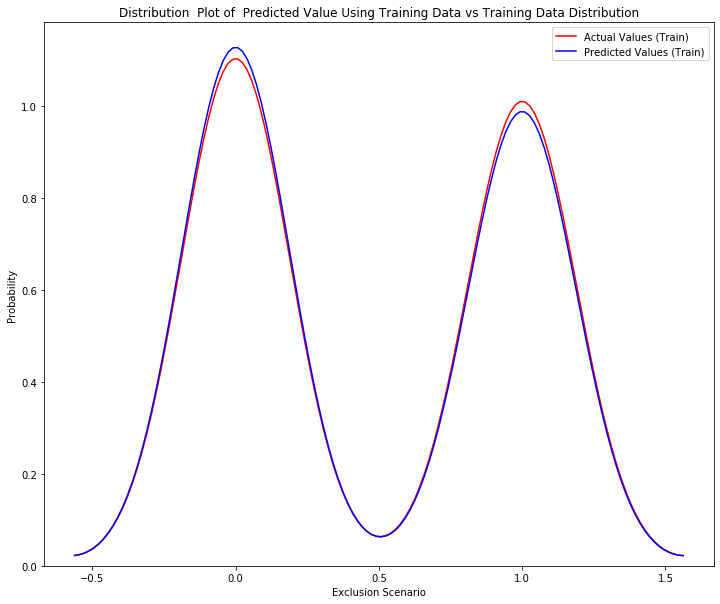

In [19]:
#examine the distribution of the predicted values of the training data.

Title = 'Distribution  Plot of  Predicted Value Using Training Data vs Training Data Distribution'
DistributionPlot(y_train, yhat_train, "Actual Values (Train)", "Predicted Values (Train)", Title)

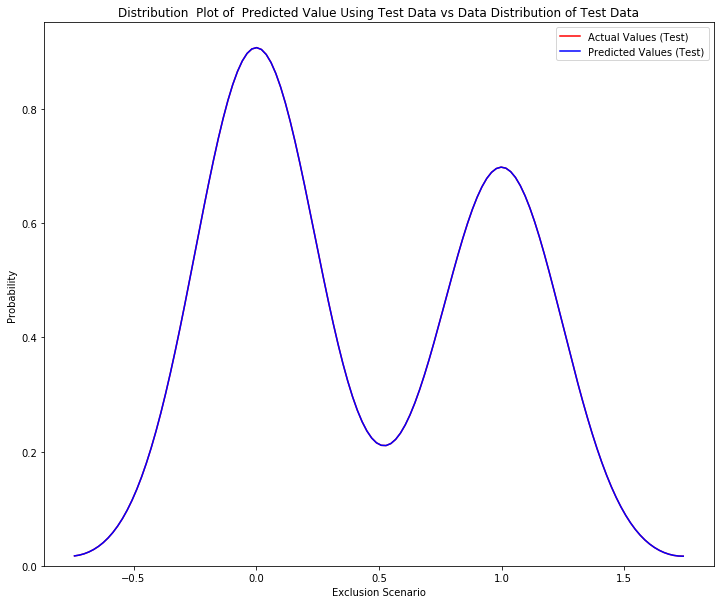

In [20]:
#what happens when the model encounters new data from the testing dataset? 
Title='Distribution  Plot of  Predicted Value Using Test Data vs Data Distribution of Test Data'
DistributionPlot(y_test,yhat_test,"Actual Values (Test)","Predicted Values (Test)",Title)

## KNN

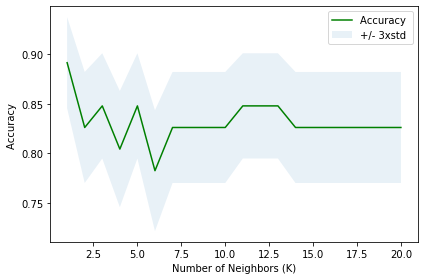

In [21]:
# KNN (k nearest neighbors)
from sklearn.neighbors import KNeighborsClassifier

mean_acc=np.zeros(20)
std_acc = np.zeros(20)
for i in range(1,21):
    knnmodel=KNeighborsClassifier(n_neighbors=i).fit(X_train_scaled,y_train)
    y_pred=knnmodel.predict(X_test_scaled)
    mean_acc[i-1]=metrics.accuracy_score(y_test,y_pred)
    std_acc[i-1]=np.std(y_pred==y_test)/np.sqrt(y_pred.shape[0])
    
plt.plot(range(1,21),mean_acc,'g')
plt.fill_between(range(1,21),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

In [22]:
print( "Highest accuracy for KNN:", mean_acc.max(), "with k=", mean_acc.argmax()+1)

Highest accuracy for KNN: 0.8913043478260869 with k= 1


In [23]:
std_clf = make_pipeline(StandardScaler(), PCA(n_components=2), KNeighborsClassifier())
std_clf.fit(X_train, y_train)
pred_test_std = std_clf.predict(X_test)
print('\nPrediction accuracy for the standardized test dataset with PCA for KNN')
print('{:.2%}\n'.format(metrics.accuracy_score(y_test, pred_test_std)))


Prediction accuracy for the standardized test dataset with PCA for KNN
80.43%



In [24]:
print(cross_val_score(knnmodel, X, y))

[0.60869565 0.58695652 0.56521739 0.64444444 0.57777778]


## SVM

In [25]:
#SVM (support vector machine)
from sklearn import svm
svm=svm.SVC(kernel='rbf', probability=True)
svm.fit(X_train_scaled,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [26]:
b_pred=svm.predict(X_test_scaled)
acc = metrics.accuracy_score(y_test,y_pred)
print("Highest Accuracy for SVM:", acc)

Highest Accuracy for SVM: 0.8260869565217391


In [27]:
print(cross_val_score(svm, X, y))

[0.54347826 0.54347826 0.52173913 0.57777778 0.55555556]


In [28]:
#Perceptron
from sklearn.linear_model import Perceptron
ppn = Perceptron(eta0=0.1, random_state=0)
# Train the perceptron
ppn.fit(X_train_scaled, y_train)

Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=0.1,
           fit_intercept=True, max_iter=1000, n_iter_no_change=5, n_jobs=None,
           penalty=None, random_state=0, shuffle=True, tol=0.001,
           validation_fraction=0.1, verbose=0, warm_start=False)

In [29]:
std_clf = make_pipeline(StandardScaler(), PCA(n_components=2), Perceptron())
std_clf.fit(X_train, y_train)
pred_test_std = std_clf.predict(X_test)
print('\nPrediction accuracy for the standardized test dataset with PCA for PT')
print('{:.2%}\n'.format(metrics.accuracy_score(y_test, pred_test_std)))


Prediction accuracy for the standardized test dataset with PCA for PT
78.26%



In [30]:
print(cross_val_score(ppn, X, y))

[0.82608696 0.82608696 0.89130435 0.53333333 0.46666667]


# Explicit measures

In [32]:
#select interesting columns for explicit measures
df2 = df1[['depression.case','anxiety.case', 'exclusion_coding']]

In [33]:
#drop missing values
df2.dropna(inplace=True)

/Users/kristinpredeck/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [35]:
#replace categorical variable with numeric values
df2['exclusion_coding'].replace(to_replace=['Social avoidance','Social exclusion'], value=[0,1],inplace=True)

/Users/kristinpredeck/opt/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:6746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [36]:
#check 
df2.head()

,depression.case,anxiety.case,exclusion_coding
0,0,1,0
1,0,0,0
2,0,1,0
3,0,0,1
4,0,1,1


# Model

In [37]:
#plot correlation matrix 
df2.corr()

,depression.case,anxiety.case,exclusion_coding
depression.case,1.000000,0.292762,-0.104985
anxiety.case,0.292762,1.000000,-0.100402
exclusion_coding,-0.104985,-0.100402,1.000000


In [39]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn import metrics
X1 = df2[['depression.case', 'anxiety.case']]
y1 = df2['exclusion_coding']

X1_train, X1_test, y1_train, y1_test = train_test_split(X1,y1, test_size = 0.2, random_state =4)

In [40]:
#build model
lr=LogisticRegression(C=0.01,solver='liblinear').fit(X1_train,y1_train)

In [41]:
#make predicted values
y1_pred=lr.predict(X1_test)

In [42]:
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
std1_clf = make_pipeline(StandardScaler(), PCA(n_components=2), LogisticRegression())
std1_clf.fit(X1_train, y1_train)
pred_test_std1 = std1_clf.predict(X1_test)

In [43]:
print('\nPrediction accuracy for the standardized test dataset with PCA')
print('{:.2%}\n'.format(metrics.accuracy_score(y1_test, pred_test_std1)))


Prediction accuracy for the standardized test dataset with PCA
56.52%



In [44]:
#cross val 
from sklearn.model_selection import cross_val_score
from numpy import mean
from numpy import std
print(cross_val_score(lr, X1, y1))

[0.54347826 0.52173913 0.52173913 0.53333333 0.53333333]


In [50]:
#fitting a model and computing the score 5 consecutive times (with different splits each time)
scores2 = cross_val_score(lr, X1, y1, cv=5)

In [53]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores2.mean(), scores2.std()))

0.53 accuracy with a standard deviation of 0.01


# Combined

In [59]:
both = df1[['exclusion_coding', 'wordcounts', 'compound', 'binary_emotion_words', 'binary_passive_words', 'binary_counterfactual_words', 'binary_third_person_words', 'binary_first_person_words', 'depression.case', 'anxiety.case']]

In [60]:
both.head()

,exclusion_coding,wordcounts,compound,binary_emotion_words,binary_passive_words,binary_counterfactual_words,binary_third_person_words,binary_first_person_words,depression.case,anxiety.case
0,Social avoidance,66,-0.3327,1,0,0,0,0,0,1
1,Social avoidance,31,-0.6590,0,0,0,0,1,0,0
2,Social avoidance,25,-0.7594,1,0,0,0,1,0,1
3,Social exclusion,42,-0.5307,1,0,0,1,0,0,0
4,Social exclusion,50,0.3182,0,1,0,1,0,0,1


In [61]:
#drop missing values
both.dropna(inplace=True)

/Users/kristinpredeck/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [62]:
#replace categorical variable with numeric values
both['exclusion_coding'].replace(to_replace=['Social avoidance','Social exclusion'], value=[0,1],inplace=True)

/Users/kristinpredeck/opt/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:6746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [63]:
#plot correlation matrix 
both.corr()

,exclusion_coding,wordcounts,compound,binary_emotion_words,binary_passive_words,binary_counterfactual_words,binary_third_person_words,binary_first_person_words,depression.case,anxiety.case
exclusion_coding,1.000000,0.097937,0.134799,0.164659,0.395839,-0.003823,0.552282,-0.718042,-0.104985,-0.100402
wordcounts,0.097937,1.000000,0.179355,0.164901,-0.034660,0.281725,0.109334,-0.001567,-0.035361,0.002075
compound,0.134799,0.179355,1.000000,-0.194722,0.047814,-0.001641,0.019616,-0.151773,-0.098174,-0.133300
binary_emotion_words,0.164659,0.164901,-0.194722,1.000000,-0.057242,0.149913,0.106757,-0.120998,0.053071,0.039417
binary_passive_words,0.395839,-0.034660,0.047814,-0.057242,1.000000,-0.049841,-0.072496,-0.354291,-0.068099,0.122435
binary_counterfactual_words,-0.003823,0.281725,-0.001641,0.149913,-0.049841,1.000000,0.077102,-0.000499,-0.086293,-0.026622
binary_third_person_words,0.552282,0.109334,0.019616,0.106757,-0.072496,0.077102,1.000000,-0.451340,-0.027020,-0.037254
binary_first_person_words,-0.718042,-0.001567,-0.151773,-0.120998,-0.354291,-0.000499,-0.451340,1.000000,0.014452,0.013993
depression.case,-0.104985,-0.035361,-0.098174,0.053071,-0.068099,-0.086293,-0.027020,0.014452,1.000000,0.292762
anxiety.case,-0.100402,0.002075,-0.133300,0.039417,0.122435,-0.026622,-0.037254,0.013993,0.292762,1.000000


In [64]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn import metrics
X2 = both[['wordcounts', 'compound', 'binary_emotion_words', 'binary_passive_words', 'binary_counterfactual_words', 'binary_third_person_words', 'binary_first_person_words', 'depression.case', 'anxiety.case']]
y2 = both['exclusion_coding']

X2_train, X2_test, y2_train, y2_test = train_test_split(X2,y2, test_size = 0.2, random_state =4)

In [65]:
#build model
lr=LogisticRegression(C=0.01,solver='liblinear').fit(X2_train,y2_train)

In [66]:
#fitting a model and computing the score 5 consecutive times (with different splits each time)
scores3 = cross_val_score(lr, X2, y2, cv=5)

In [67]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores3.mean(), scores3.std()))

0.87 accuracy with a standard deviation of 0.04


# Results

|Model      | Accuracy | Standard Deviation|
|-----|-------|------|
|Linguistic Measures     | .86      | .03 |
|Explicit Measures   | .53      | .01 |
| Combined | .87 | .04|